## Twin Classification

### 1. Install Packages and Libraries

In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

2024-01-21 13:23:21.079647: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-21 13:23:21.624959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 13:23:25.568766: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 13:23:25.582676: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 13:23:29.320972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# To import and transform images 
from keras.preprocessing import image_dataset_from_directory

# To build the NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# To save the model
from tensorflow.keras.models import load_model

## 2. Access Image data in data folder

In [3]:
batchsize=2
data_directory = "data"
data = image_dataset_from_directory(data_directory, batch_size=batchsize)

Found 23 files belonging to 2 classes.


2024-01-21 13:23:42.586524: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(2, 256, 256, 3)

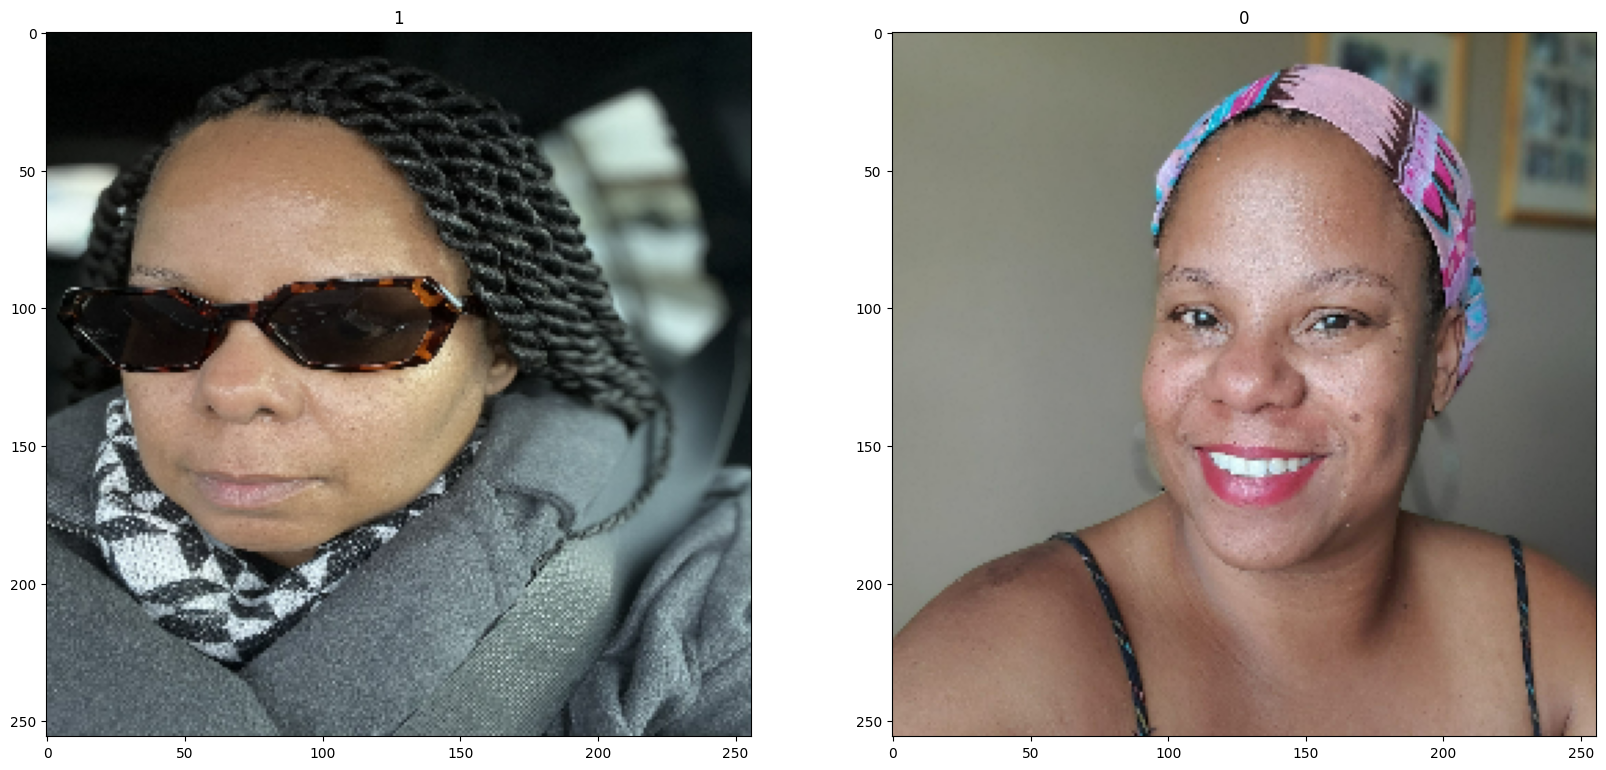

In [5]:
fig, ax = plt.subplots(ncols=batchsize, figsize=(20,20))
for idx, img in enumerate(batch[0][:batchsize]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Kisha images are classified as 0 and Kym images are classified as 1

## 3. Scale and Split the Data

In [6]:
# Scale the data
data = data.map(lambda x,y: (x/255,y))

#Split Data
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)+1
print(f"Training: {train_size}, Validation: {val_size}, Test: {test_size}")

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Training: 7, Validation: 3, Test: 3


## 4. Build the Deep Learning Model

In [7]:
# Input Layer, 2 Convolutional Hidden Layers, a Flatten and Dense Layer and Output Layer 
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 5. Train The model

In [10]:
# for Logging
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# fitting the model with the training data
hist = model.fit(train, epochs=10, validation_data=val, callbacks =[tensorboard_callback])


Epoch 1/10


7/7 [==============================] - 3s 153ms/step - loss: 1.0545 - accuracy: 0.3571 - val_loss: 0.6782 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 1s 77ms/step - loss: 0.6514 - accuracy: 0.7143 - val_loss: 0.5999 - val_accuracy: 0.8333
Epoch 3/10
7/7 [==============================] - 1s 74ms/step - loss: 0.5986 - accuracy: 0.8571 - val_loss: 0.5433 - val_accuracy: 0.8333
Epoch 4/10
7/7 [==============================] - 1s 77ms/step - loss: 0.4254 - accuracy: 0.9286 - val_loss: 0.4998 - val_accuracy: 0.8333
Epoch 5/10
7/7 [==============================] - 1s 74ms/step - loss: 0.3412 - accuracy: 0.9286 - val_loss: 0.1150 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 72ms/step - loss: 0.1751 - accuracy: 0.9286 - val_loss: 0.0524 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 134ms/step - loss: 0.1532 - accuracy: 0.9286 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 8/10
7/7 [====================

## 6. Model Analysis

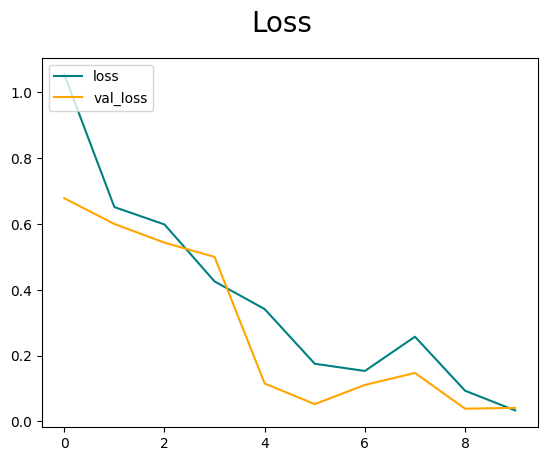

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


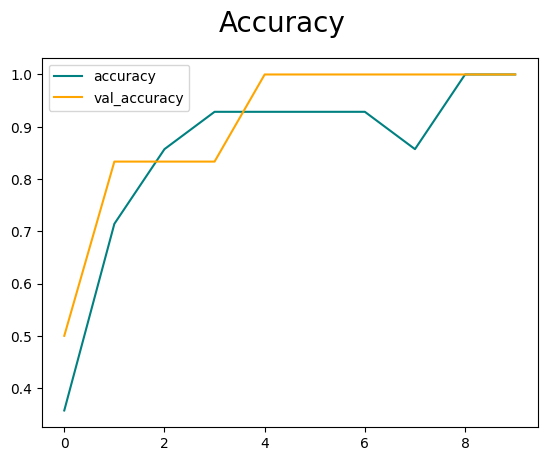

In [12]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 7. Save and Register the Model

In [13]:
# Save the model
model.save(os.path.join('models', 'twinclassifier.h5'))
#model.save('twinclassifier.keras')

/anaconda/envs/tf215/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Register the model to the workspace
#model = run.regster_model(model_name='twin_classifier', model_path='./models/twinclassifier.h5')
#print(model.name, model.id, model.version, sep='\t')